# Load Data

## Load excel and Cleanup Data
- trim whitespace
- Convert column Entry Time, Post-Consultation Time and Completion Time to Datetime
- Create Waiting Time column and drop negative value.
- Convert Medication Revenue, Lab Cost and Consultation Revenue to numerical and replace '`$-`' to `0`

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import datetime
from pandas.plotting import scatter_matrix
%matplotlib inline

In [213]:
df = pd.read_excel("hw#2_data.xlsx")
df = df.rename(columns=lambda x: x.strip())

In [ ]:
df['Entry Time'] = pd.to_datetime(df['Entry Time'], format="%H:%M:%S")
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'], format="%H:%M:%S")
df['Completion Time'] = pd.to_datetime(df['Completion Time'], format="%H:%M:%S")

In [216]:
df['Consultation Time'] = df['Completion Time'] - df['Entry Time']
df['Waiting Time'] = df['Completion Time'] - df['Post-Consultation Time']

In [217]:
negative_watingtime = df[df['Waiting Time'] < datetime.timedelta(0)].index
negative_consulttime = df[df['Consultation Time'] < datetime.timedelta(0)].index
df = df.drop(negative_watingtime)
df = df.drop(negative_consulttime)

In [219]:
df['Medication Revenue'] = pd.to_numeric(df['Medication Revenue'].replace(' $-   ','0'))
df['Lab Cost'] = pd.to_numeric(df['Lab Cost'].replace(' $-   ','0'))
df['Consultation Revenue'] = pd.to_numeric(df['Consultation Revenue'].replace(' $-   ','0'))

In [224]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Consultation Time,Waiting Time
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,1900-01-01 08:35:45,1900-01-01 09:17:54,1900-01-01 09:29:46,C10001,0 days 00:54:01,0 days 00:11:52
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,1900-01-01 19:19:16,1900-01-01 21:02:36,1900-01-01 21:24:07,C10002,0 days 02:04:51,0 days 00:21:31
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,1900-01-01 10:46:52,1900-01-01 11:56:25,1900-01-01 12:06:28,C10003,0 days 01:19:36,0 days 00:10:03
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,1900-01-01 09:38:34,1900-01-01 10:55:50,1900-01-01 10:58:02,C10004,0 days 01:19:28,0 days 00:02:12
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,1900-01-01 11:16:21,1900-01-01 12:06:49,1900-01-01 12:06:54,C10005,0 days 00:50:33,0 days 00:00:05


# Business Questions

## a) Does the financial type affect the waiting time? Explain with appropriate chart


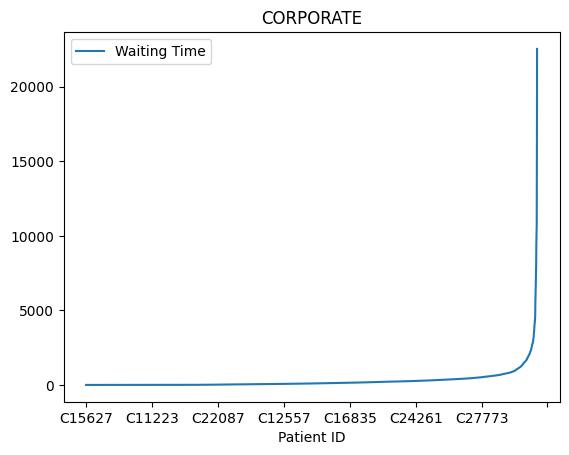

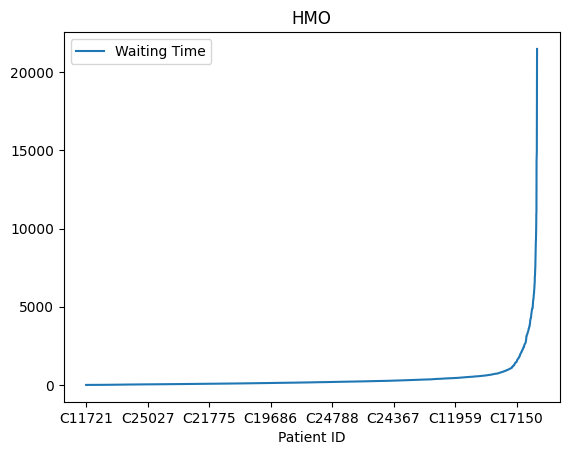

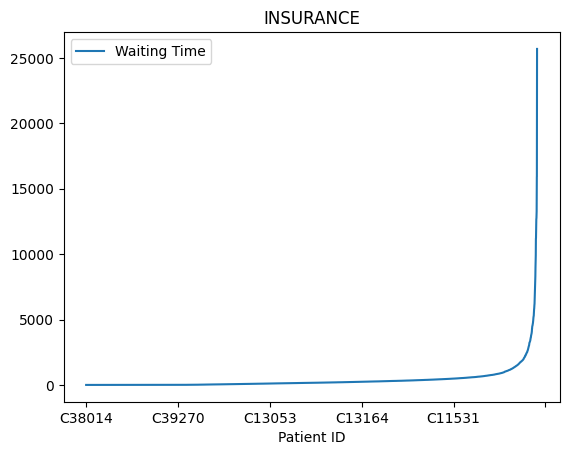

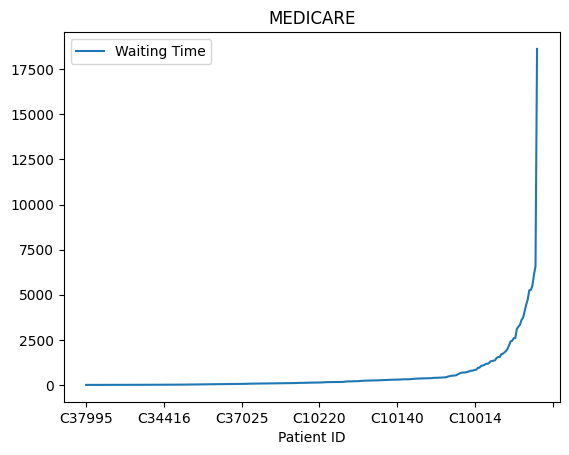

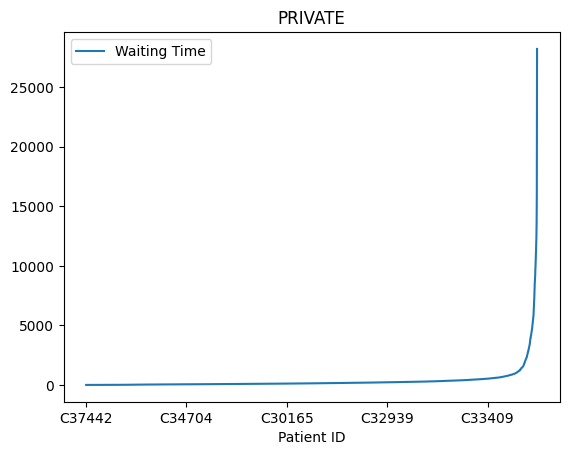

In [314]:
ax = df.sort_values('Waiting Time').groupby('Financial Class')
for title, group in ax:
  group['Waiting Time'] = group['Waiting Time'].dt.total_seconds()
  group.plot(title=title,x='Patient ID', y='Waiting Time')

Answer : From each Financial Type plot by using Waiting Time which comes from Difference Time between Completion Time and Post-Consultation Time seems not to affect waiting time at all.

## b) What days of week are affected ? Explain with appropriate chart

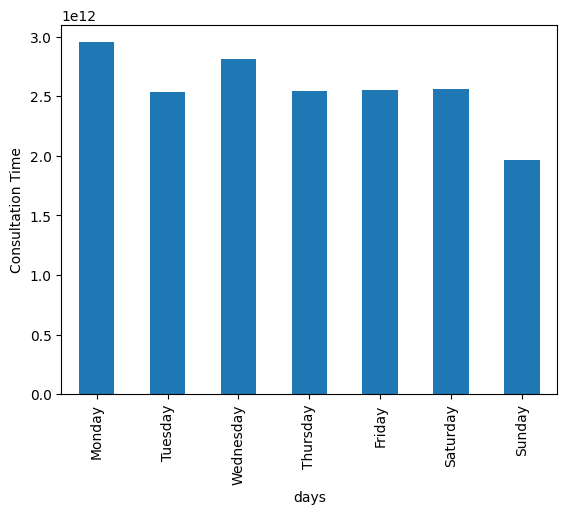

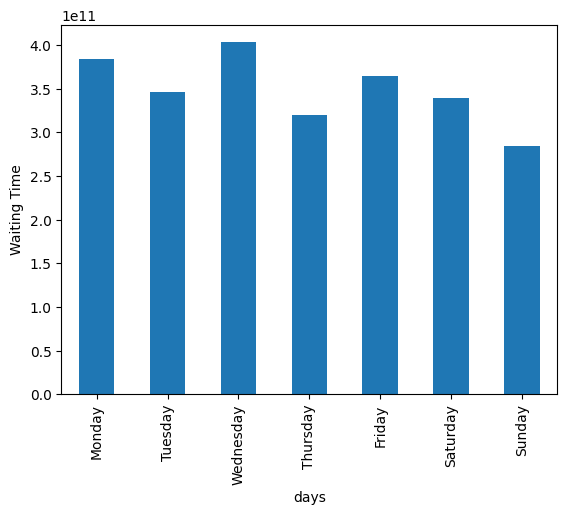

In [322]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df.groupby(df['Date'].dt.day_name())['Consultation Time'].mean().reindex(days).plot.bar(xlabel='days',ylabel='Consultation Time')
plt.show()
df.groupby(df['Date'].dt.day_name())['Waiting Time'].mean().reindex(days).plot.bar(xlabel='days',ylabel='Waiting Time')
plt.show()

Monday average Consultation time is the highest one but Wednesday average Waiting Time is the highest.

Both Average Consultation Time and Average Waiting Time on Sunday is the lowest.


## c) Are waiting times associated with the busy periods (morning hours)? Explain with appropriate chart

In [336]:
morning_hour = df.sort_values(by='Entry Time').loc[(df['Entry Time'] >= datetime.datetime(1900,1,1,6,0,0)) & (df['Entry Time'] <= datetime.datetime(1900,1,1,12,0,0))]
morning_hour['Waiting Time'] = morning_hour['Waiting Time'].dt.total_seconds()

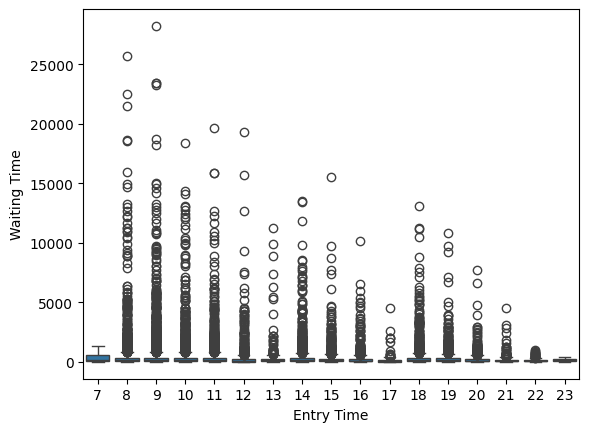

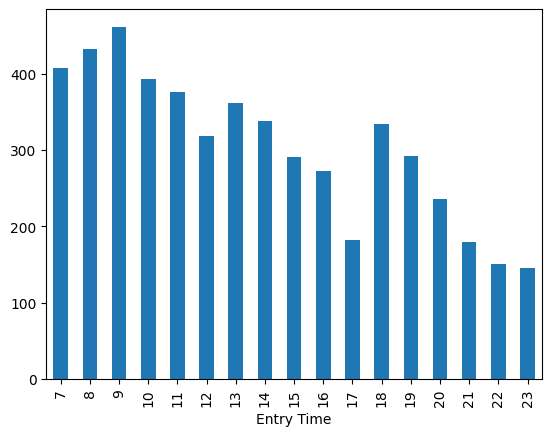

In [337]:
non_morning_hour = df.sort_values(by='Entry Time').loc[~((df['Entry Time'] >= datetime.datetime(1900,1,1,6,0,0)) & (df['Entry Time'] <= datetime.datetime(1900,1,1,12,0,0)))]
non_morning_hour['Waiting Time'] = non_morning_hour['Waiting Time'].dt.total_seconds()
morning_hour['Entry Time'] = morning_hour['Entry Time'].dt.hour
non_morning_hour['Entry Time'] = non_morning_hour['Entry Time'].dt.hour
sns.boxplot(x='Entry Time', y='Waiting Time', data=pd.concat([morning_hour,non_morning_hour]))
plt.show()
pd.concat([morning_hour,non_morning_hour]).groupby('Entry Time')['Waiting Time'].mean().plot.bar()
plt.show()

Waiting Time in busy hours (7am - 11.59am) is affected too by using the waiting time box-plot and average waiting time bar chart all of them group by per hours.

## d.) What do you suggest as Action Plans to the management to improve customer satisfaction?

- Every customer's waiting time for financial services is the same, so it cannot be managed perfectly every hour. However, service can be improved during morning hours while waiting after consultation time.

- Since the data comes from the hospital, every minute is important. If we can improve customer service from hospital employees, customers will be more satisfied.

- Improve management to reduce maximum wait times.